# Center for Worlds University Rankings (CWUR) Exploring Relationships

## 1. Importing Libraries and cleaned dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Importing combined dataset

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [3]:
# Import dataset

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_cleaned_final.csv'))

In [4]:
# Check to see if dataset was imported properly

df_cwur

,Unnamed: 0,world_rank_CWUR,university_name,country,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [5]:
df_cwur.shape

(2200, 15)

## 2. Use the questions from the previous exercise to pick out variables suitable for the exploratory visual analysis

#### The goal for this visual analysis is to see which factor(s) correlate most strongly with high university rankings (the world_rank_cwur column)

In [6]:
# Check datatypes of the columns. Correlations will only work with numerical columns

df_cwur.dtypes

Unnamed: 0                     int64
world_rank_CWUR                int64
university_name               object
country                       object
national_rank                  int64
quality_of_education_rank      int64
alumni_employment_rank         int64
quality_of_faculty_rank        int64
publications_rank              int64
influence_rank                 int64
citations_rank                 int64
broad_impact_rank            float64
patents_rank                   int64
overall_score_CWUR           float64
year                           int64
dtype: object

In [7]:
# Drop the 'Unnamed: 0' column as this was an automatically generated index column

df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])

In [8]:
# Can drop the 'university name' and 'country' columns for this since they are object columns.
# For the numerical columns, the 'national_rank', 'overall_score_CWUR', and 'year' columns can be omitted.
# Create a subset that does not include these 5 columns

df_cwur_sub1 = df_cwur.drop(columns = ['university_name', 'country', 'national_rank', 'overall_score_CWUR', 'year'])

df_cwur_sub1

,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank
0,1,7,9,1,1,1,1,NaN,5
1,2,9,17,3,12,4,4,NaN,1
2,3,17,11,5,4,2,2,NaN,15
3,4,10,24,4,16,16,11,NaN,50
4,5,2,29,7,37,22,22,NaN,18
...,...,...,...,...,...,...,...,...,...
2195,996,367,567,218,926,845,812,969.0,816
2196,997,236,566,218,997,908,645,981.0,871
2197,998,367,549,218,830,823,812,975.0,824
2198,999,367,567,218,886,974,812,975.0,651


### ** Analysis in the next major steps has been performed with all of the universities regardless of rank. However, this has led to too many data points in scatterplots, pairplots, and catplots and made graphs difficult to interpret. As a result, analysis will be performed with a subset of the data (top 200 universities per year). Note that in 2012 and 2013, there was only information on the top 100 universities. **

In [9]:
# Create a subset of the top 200 universities per year
# Create a further subset that removes columns that are currently unnecessary
# Check the size of the subset (should be 600 rows only)

df_top200 = df_cwur[df_cwur['world_rank_CWUR'] <= 200]

df_top200_sub1 = df_top200.drop(columns = ['university_name', 'country', 'national_rank', 'overall_score_CWUR', 'year'])

df_top200_sub1.shape

(600, 9)

## 3. Create a colored correlation matrix heatmap. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [10]:
# Create a correlation matrix of the subset

df_top200_sub1.corr()

,world_rank_CWUR,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank
world_rank_CWUR,1.000000,0.627192,0.483838,0.700225,0.533837,0.558104,0.528148,0.452390,0.465839
quality_of_education_rank,0.627192,1.000000,0.323820,0.687983,0.340838,0.472083,0.375845,0.275804,0.205654
alumni_employment_rank,0.483838,0.323820,1.000000,0.203500,0.203177,0.061725,0.192209,-0.066973,0.307638
quality_of_faculty_rank,0.700225,0.687983,0.203500,1.000000,0.428882,0.584973,0.477490,0.404192,0.304457
publications_rank,0.533837,0.340838,0.203177,0.428882,1.000000,0.795041,0.767970,0.864830,0.435684
influence_rank,0.558104,0.472083,0.061725,0.584973,0.795041,1.000000,0.767023,0.880980,0.357786
citations_rank,0.528148,0.375845,0.192209,0.477490,0.767970,0.767023,1.000000,0.849113,0.394858
broad_impact_rank,0.452390,0.275804,-0.066973,0.404192,0.864830,0.880980,0.849113,1.000000,0.337400
patents_rank,0.465839,0.205654,0.307638,0.304457,0.435684,0.357786,0.394858,0.337400,1.000000


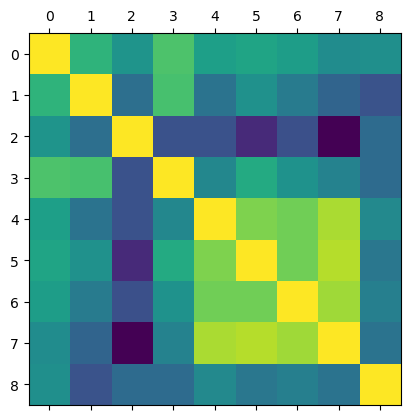

In [11]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_top200_sub1.corr())
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18044\2250501094.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() #set tight layout so figure doesn't get cut off when saving


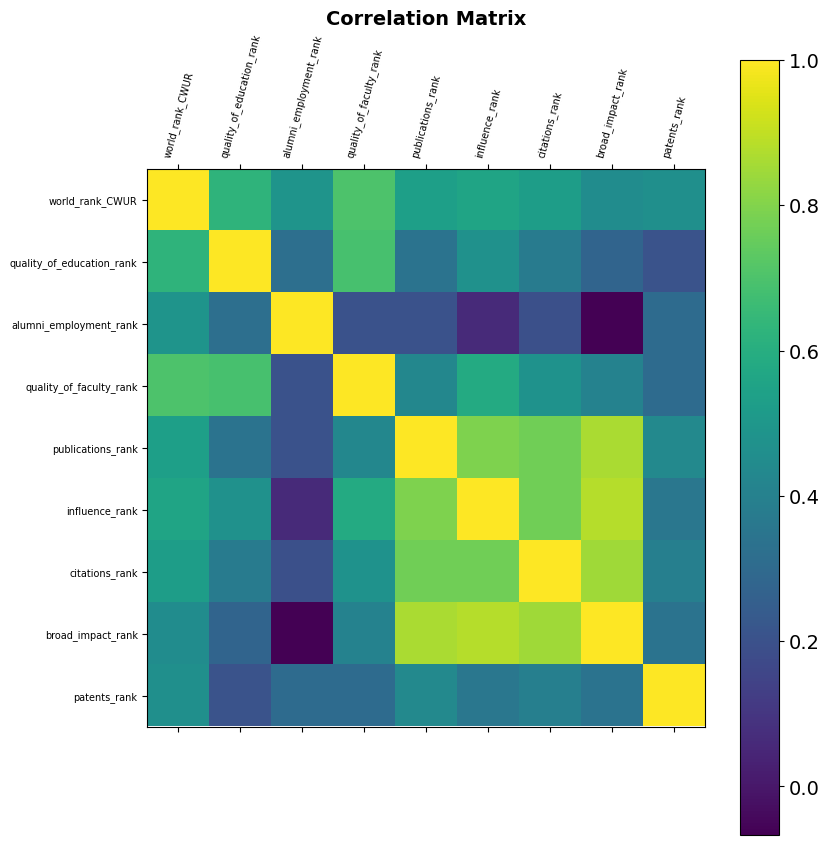

In [12]:
# Add labels, a legend, and change the size of the heatmap. Saving the figure to Visualizations folder. 

f = plt.figure(figsize=(9, 10)) # figure size 
plt.matshow(df_top200_sub1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_top200_sub1.shape[1]), df_top200_sub1.columns, fontsize=7, rotation=75) # x axis labels
plt.yticks(range(df_top200_sub1.shape[1]), df_top200_sub1.columns, fontsize=7) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14, fontweight = 'bold') # add title
plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_cwur_top200_plt.png')) #save figure

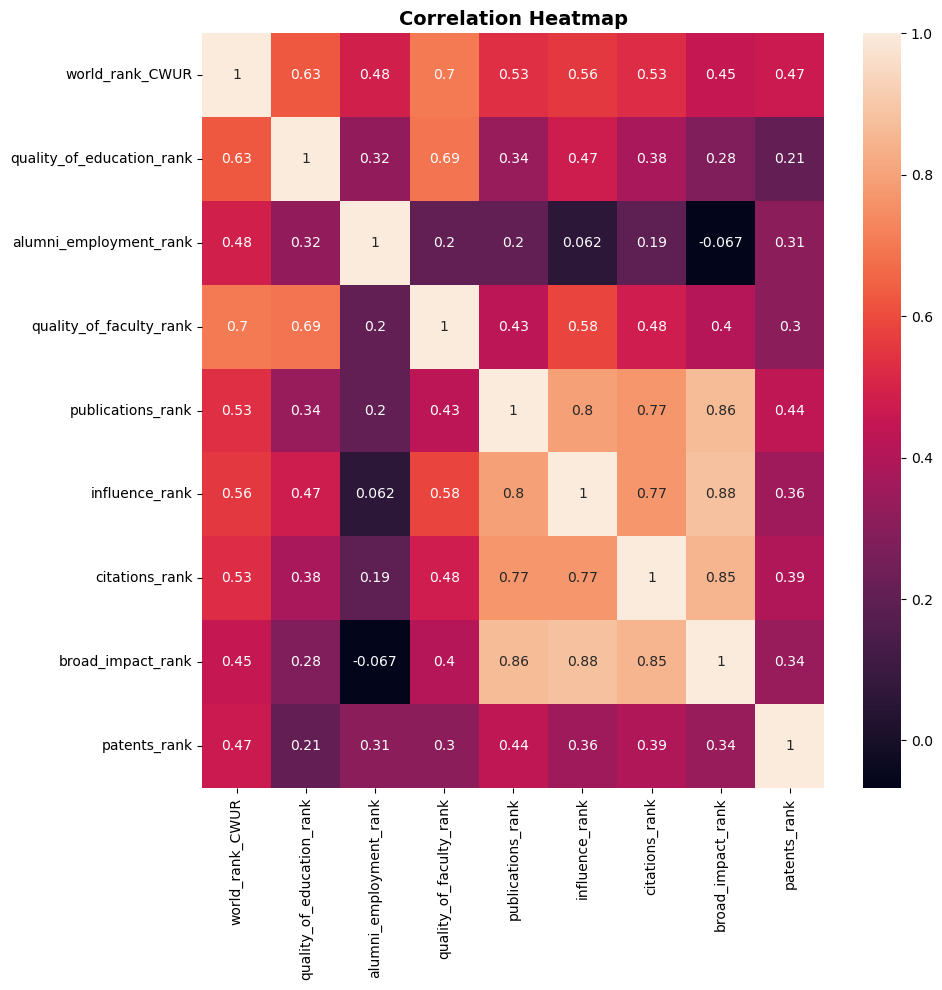

In [13]:
# Creating the same heatmap with seaborn instead of matplotlib

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_top200_sub1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

ax.set_title( "Correlation Heatmap" , size = 14, fontweight = 'bold') #add title

plt.tight_layout() #set tight layout so figure doesn't get cut off when saving

f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_cwur_top200_sns.png')) #save figure


Higher numbers inside the pixels indicate higher correlation coefficients which indicate a stronger relationship between variables. However, it is important to note that a high correlation coefficient doesn't necessarily mean that the variables are linearly dependent on each other or even dependent on each other at all. For example, even though the 'quality_of_education_rank' and the 'quality_of_faculty_rank' variables have a strong correlation coefficient of 0.69, these variables should be largely indepedent of each other since they are separate factors in the test. In addition, there may be a confounding factor that drives them to be higher (for example, universities with a higher number in the quality_of_faculty_rank typically do not have professors that hold classes to much higher standards, which in turn would cause the quality_of_education_rank number to increase as well since the overall standards do not match top universities. 

The main thing to note is the correlation coefficients with the 'world_rank_CWUR' column and the other respective columns. After creating a correlation matrix with this subset vs a correlation matrix with the original dataset, it appears that the CWUR world ranking has lower coefficients in almost every variable when considering the top universities. This is most likely due to the smaller amount of data which led to increased variance in rankings overall. Within the top 200 universities, top universities were generally correlated with factors like higher quality of education and quality of faculty as opposed to factors like broad impact and patents rankings. 

However, further investigation must be done to see if the relationships are truely linear in nature. Another thing to note is that certain ranking factors may have been weighed differently compared to others. In recent years, faculty is weighed less than research factors but this may not have been the case in 2012-2015.

## 4. Create a scatterplot(s) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output.

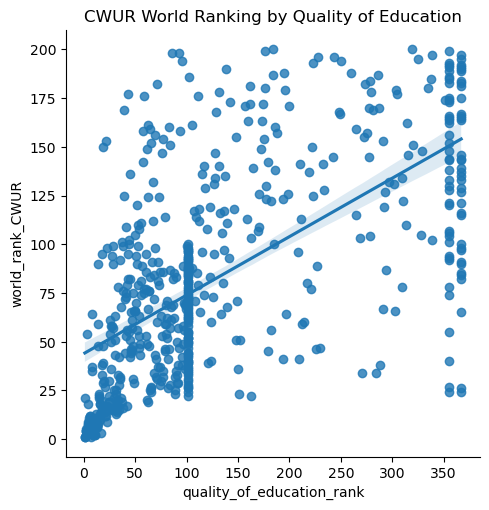

In [14]:
# Create a scatterplot for the "world_rank_CWUR" and "quality_of_education_rank" columns in seaborn

scat_1 = sns.lmplot(x = 'quality_of_education_rank', y = 'world_rank_CWUR', data = df_top200_sub1).set(title = 'CWUR World Ranking by Quality of Education')

scat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_qualityeducation_cwur_top200.png'), bbox_inches="tight") #save figure

As seen in the figure above, while there was a correlation coefficient of 0.63 between the two variables, the scatterplot shows that the data is all over the place and is not very linear. There is a general upward trend between the two, in particular for those universities with a quality of education ranking below 100. The data also shows that there were also many universities within the top 100 that didn't necessarily have a high quality of education ranking. 

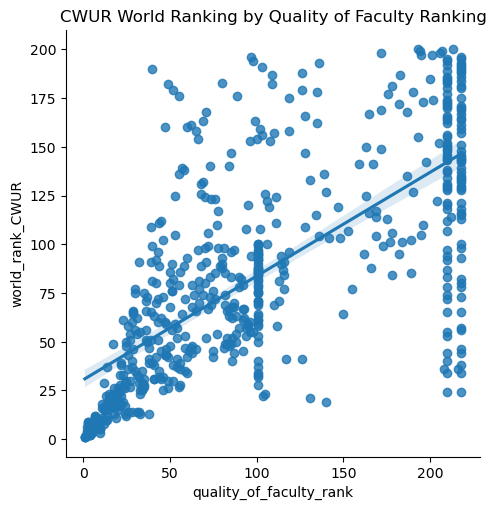

In [15]:
# Create a scatterplot for the "world_rank_CWUR" and "quality_of_faculty_rank" columns in seaborn

scat_2 = sns.lmplot(x = 'quality_of_faculty_rank', y = 'world_rank_CWUR', data = df_top200_sub1).set(title = 'CWUR World Ranking by Quality of Faculty Ranking')

scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_worldrank_qualityfaculty_cwur_top200.png'), bbox_inches="tight") #save figure

Compared to the previous figure, the correlation coefficient of 0.70 between these two variables showed a scatterplot with a stronger general upward trend. There are slightly less outliers, but there are still many universities with quality of faculty rankings hovering around 100 and 200. Once again, the data also shows that there were also many universities within the top 100 that didn't necessarily have a high quality of faculty ranking. 

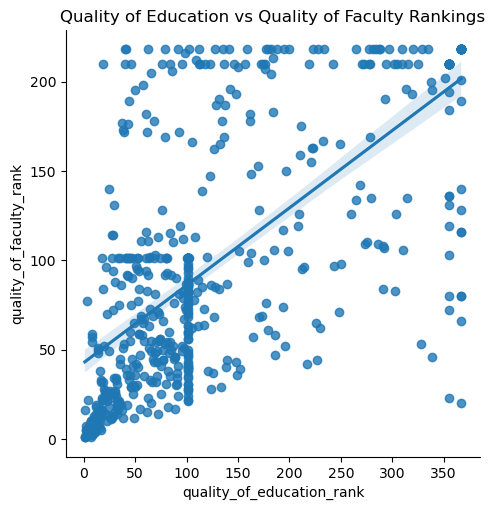

In [16]:
# Create a scatterplot for the "quality_of_education_rank" and "quality_of_faculty_rank" columns in seaborn

scat_3 = sns.lmplot(x = 'quality_of_education_rank', y = 'quality_of_faculty_rank', data = df_top200_sub1).set(title = 'Quality of Education vs Quality of Faculty Rankings')

scat_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_education_vs_faculty_cwur_top200.png'), bbox_inches="tight") #save figure

There is a general upward trend between the two, which suggests a confounding factor between the quality of education and the quality of faculty between universities. There are significant outliers though, as some universities may have great quality of education but bad faculty and vice versa. 

## 5. Create a pair plot of the entire dataset. Comment on the distribution of the variables and mark variables you'd like to explore further with an explanation of why.

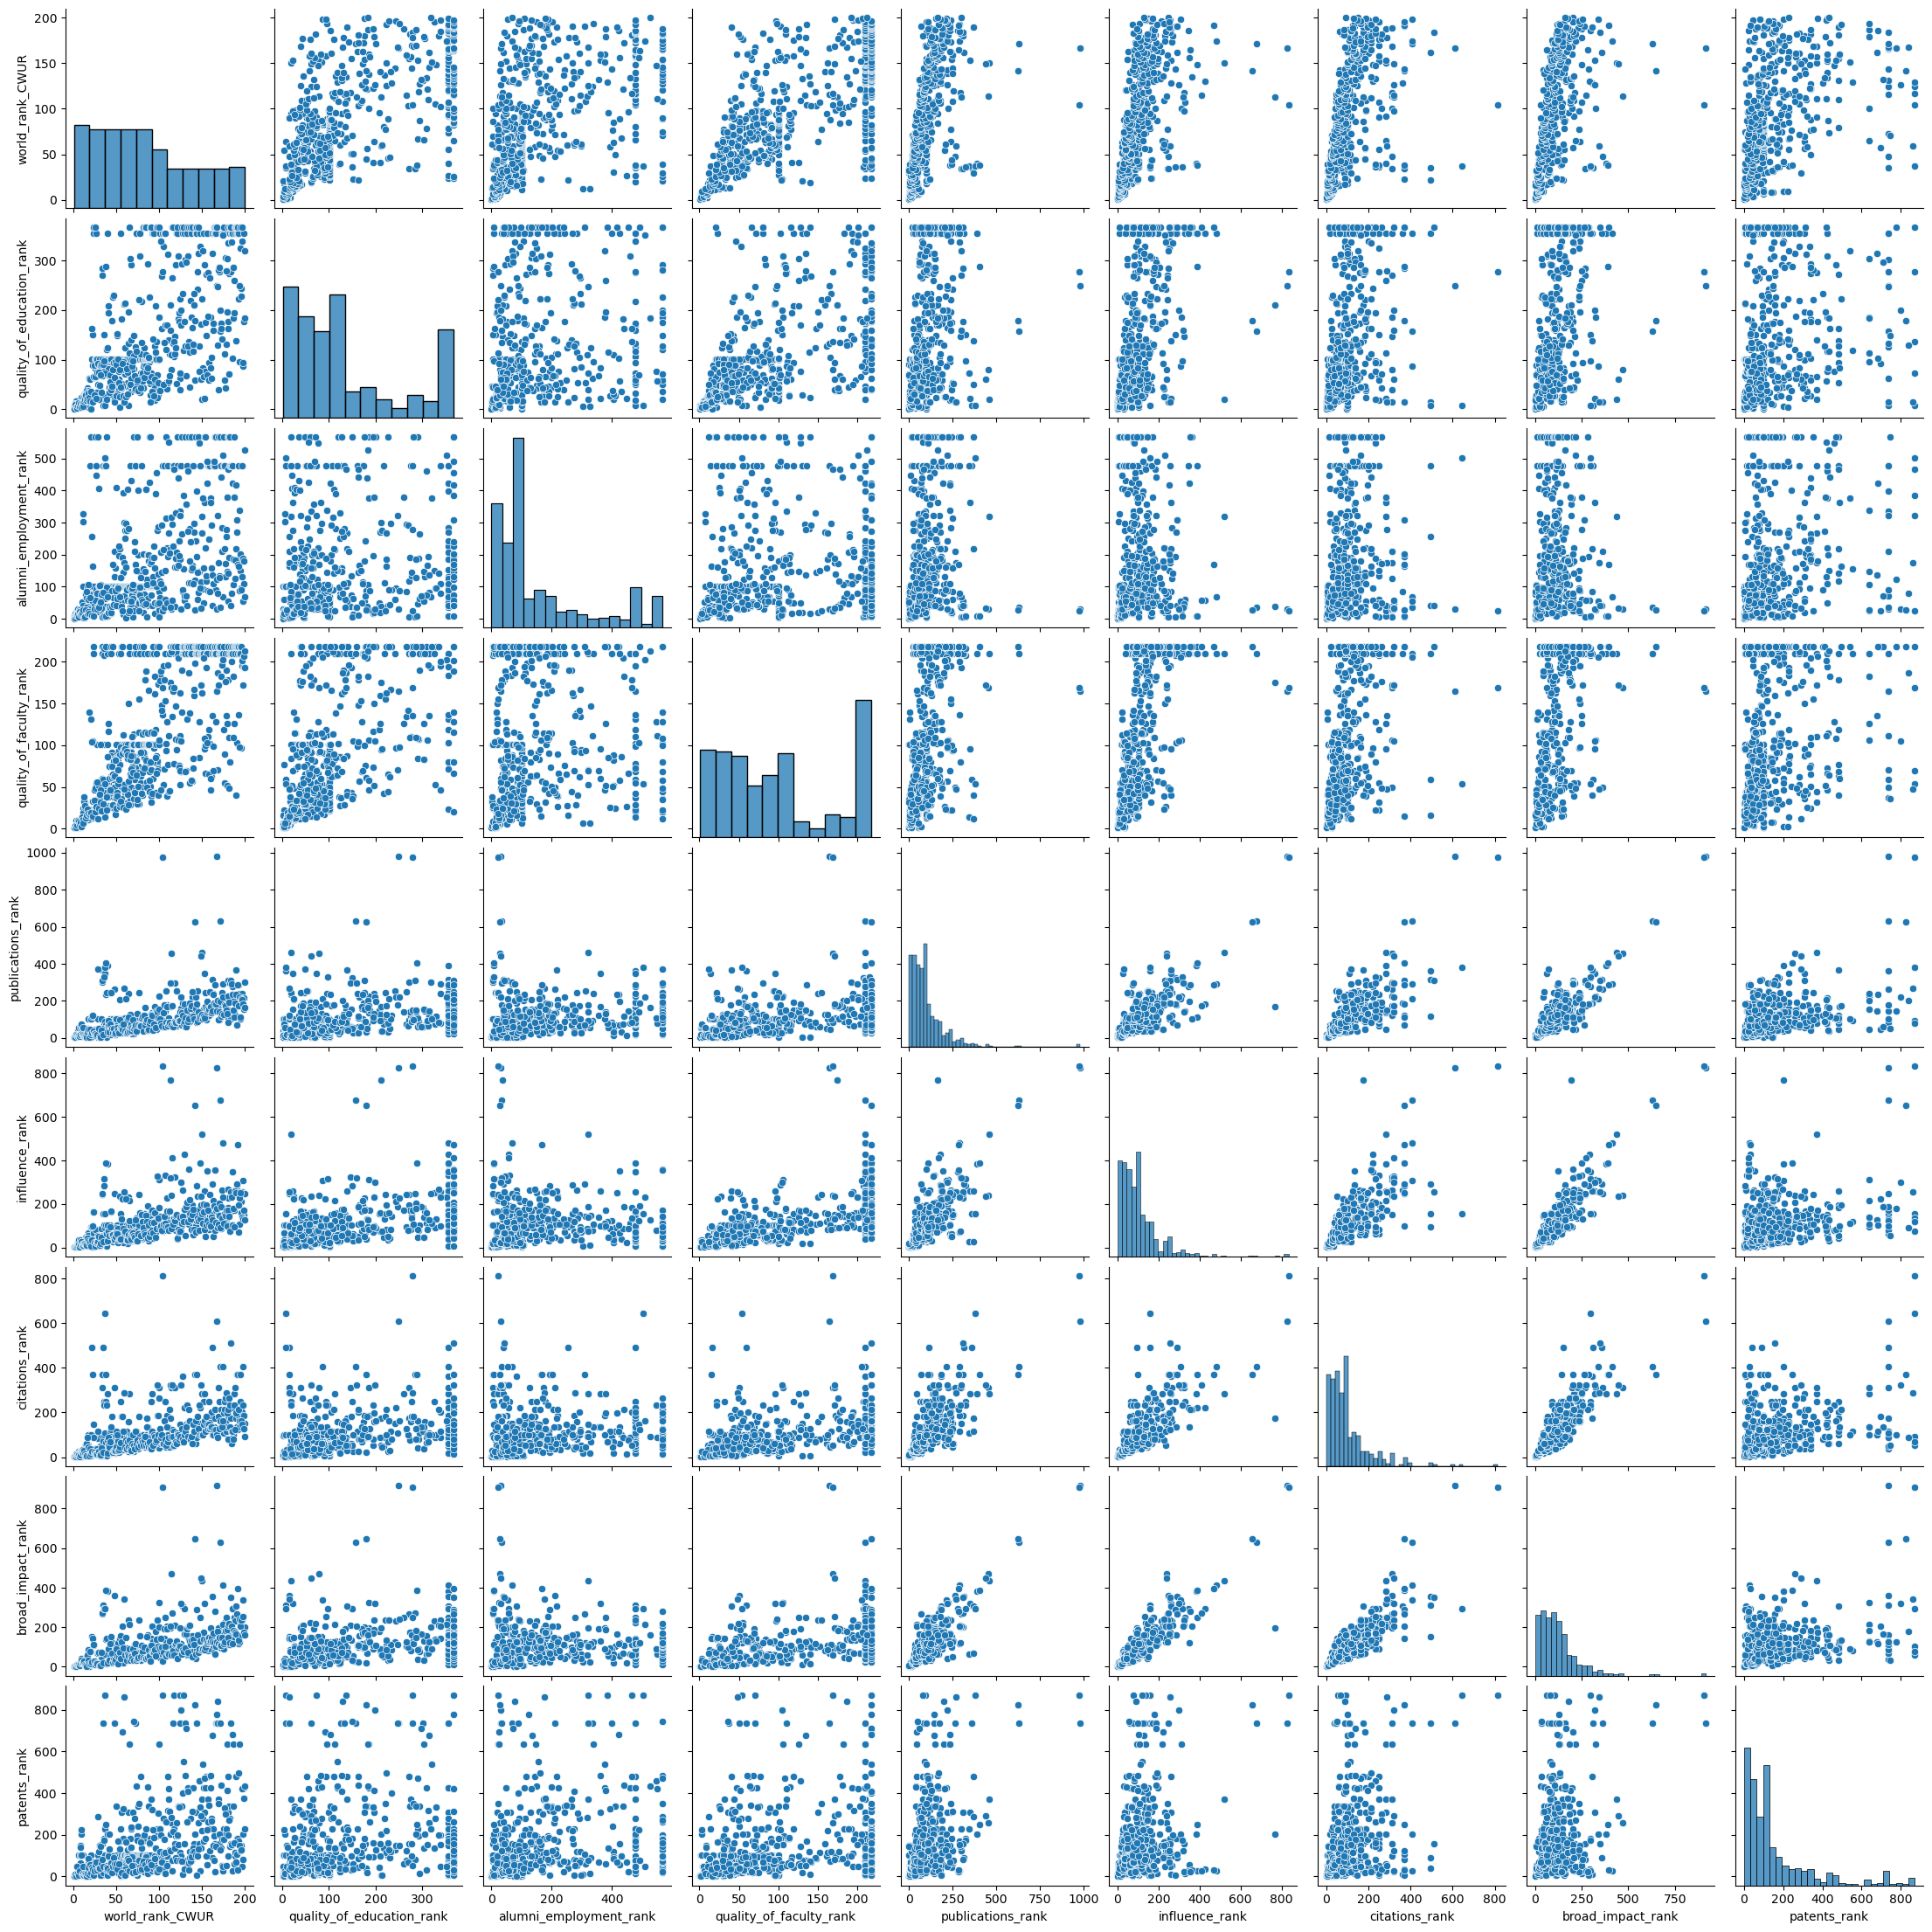

In [17]:
# Create a pair plot 

g = sns.pairplot(df_top200_sub1)

Compared to the scatterplots when analyzing all universities in the original dataset, many of the scatterplots for the top 200 universities seem to have less outliers and more general trends. For example, influence ranking and broad impact ranking seem to have a pretty strong positive relationship. Other potential relationships to investigate in the future would be broad impact rankings vs publication rankings and citations rankings vs influence rankings. These most likely have some confounding factor that impact the variables. One thing to note is that analysis regarding broad impact ranking will most likely be skewed due to the fact that all universities in 2012 and 2013 did not have any data for this variable and less data points could lead to incomplete analysis and conclusions. 

## 6. Create a categorical plot and interpret the results.

In [18]:
# Check value counts to see number of universities in each country.
# The goal is to eventually compare number of top universities by region

df_top200['country'].value_counts(dropna = False)

USA               286
United Kingdom     45
Japan              33
Germany            29
France             25
Canada             24
Switzerland        21
Netherlands        17
Israel             16
Australia          16
South Korea        14
Sweden             13
China               9
Italy               8
Denmark             8
Belgium             7
Singapore           5
Norway              4
Finland             4
Russia              3
Spain               3
Taiwan              2
South Africa        2
Brazil              2
Hong Kong           2
Ireland             2
Name: country, dtype: int64

In [19]:
# Top 200 region column

region_2 = []

for value in df_top200['country']:
    if value in ['USA', 'Canada']:
         region_2.append('North America')
    elif value in ['Australia']:
         region_2.append('Oceania')
    elif value in ['South Africa']:
         region_2.append('Africa')
    elif value in ['Brazil']:
         region_2.append('South America')
    elif value in ['Japan', 'Israel', 'South Korea', 'China', 'Singapore', 'Russia', 'Taiwan', 'Hong Kong']:
         region_2.append('Asia')
    else:
         region_2.append('Europe')
            
df_top200['region'] = region_2

df_top200['region'].value_counts(dropna = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_18044\1131748747.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top200['region'] = region_2


North America    310
Europe           186
Asia              84
Oceania           16
Africa             2
South America      2
Name: region, dtype: int64

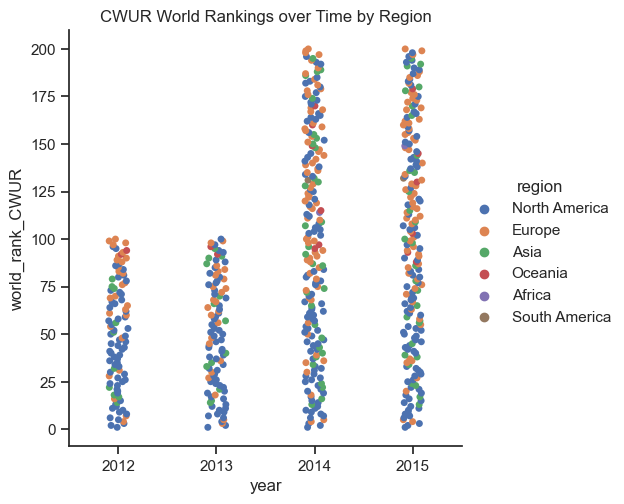

In [20]:
# Catplot for top 200

sns.set(style="ticks")
z_2 = sns.catplot(x="year", y="world_rank_CWUR", hue="region", data=df_top200).set(title = 'CWUR World Rankings over Time by Region')

For this graph, the glaring difference between the years is that 2012 and 2013 have no universites outside of the top 100. 

One interesting thing to note is that North American Universities (mostly from the USA) make up a significant percentage of the top 200 universities. This could be due to many factors but the US is typically known for having great universities and attracts students from all over the world. 

Another interesting thing to note is that European Universities make a significant portion in the top 200, but are usually more prevalent past rank 80 and beyond. These universities are scattered throughout Europe in countries like Germany, Norway, and the Netherlands. 

In [21]:
# Save figure

z_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_world_rank_year_cwur_top200.png'), bbox_inches="tight")

## 7. Revisit the questions in the previous task and write answers to those based on the exploration conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. 

Question 1: Which countries have the most/least top universities?

USA has the most universities in the top 200 by far. Taiwan, South Africa, Brazil, Hong Kong, and Ireland all have the least number of top 200 universities with 2 universities each. Going by region, North America has the largest number of top 200 universities whereas Africa and South America each only have 2 universities in the top 200.

Question 2: Do higher numbers of top universities correlate to higher general rankings of countries?

I would need to find the average ranking of universities from each country in the top 200, which I have not completed yet. This can be done in a subsequent exercise.

Question 3: Which factors, if any, were more prevalent in top universities?

This is difficult to see based on the pairplot alone. However, based on the correlation matrix it appears that quality of education rankings, quality of faculty rankings, and influence rankings appear to be the most correlated with the CWUR world rankings. 

Question 4: How did the rankings change over time? Did certain countries increase their numbers of
top universities? What factors caused this change?

These have not been completed yet since time analysis has not been completed. However, individual universities can be plotted over time to see how their respective rankings have changed. A more broad analysis can be done by completing value_counts of countries and see a trend over time. Finding factors for this change would be much more complicated and would need further analysis.

Question 5: How do the rankings and trends compare to those from the other datasets (Times Higher
Education World University Rankings and Shanghai Rankings)?

Again, this would be difficult to complete without line charts being done for individual universities/regions. This can be done in future analysis. 

## 8. Define any hypotheses that you can at this point.

Hypothesis 1: If a university is from the Asian region, it will have a higher average ranking compared to a university from the European Region.

Hypothesis 2: If a university is from the United States, it will have a higher quality of education score on average.